<a href="https://colab.research.google.com/github/Rohithtechis/Logistic-regression/blob/main/CA_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [3]:
data=pd.read_csv('/content/portu_banking_final.csv')

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


y column significance if the clint has subscried for a trem deposit or not.

were y=1 means yes
     y=0 means No


In [5]:
data.shape

(41188, 21)

In [6]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [7]:
o=4640
z=36548
print('The ratio of ones and zeros is', o/z)

The ratio of ones and zeros is 0.126956331399803


In [8]:
# The ratio for the two classes is not balanced.

In [9]:
data.describe()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

Data Cleaning

printing the data types for all the column

In [11]:
data.dtypes

age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

Here we can see that the age column has object insted of integer.
The description provided by the UCI for age is Numeric so it as to be in int64 or float64

In [12]:
data['age'].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

Age is in the object format because it has age range as well (eg 20-25), so lets replace it by the mean of the range value.

In [13]:
# replacing all the range value to mean of there range
data['age']=data['age'].replace(['25-30'],28)
data['age']=data['age'].replace(['30-40'],35)
data['age']=data['age'].replace(['35-40'],37)
data['age']=data['age'].replace(['20-40'],30)
data['age']=data['age'].replace(['20-25'],23)
data['age']=data['age'].replace(['45-50'],47)
data['age']=data['age'].replace(['50-55'],53)
data['age']=data['age'].replace(['30-32'],31)
data['age']=data['age'].replace(['18-25'],21)
data['age']=data['age'].replace(['25-30'],27)
data['age']=data['age'].replace(['30-35'],33)
data['age']=data['age'].replace(['35-30'],33)

In [14]:
data['age'].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', 33, '25', '57', '63', '58', '60', '64', '51', '23', '20',
       '74', '80', '61', 28, '62', '75', '21', '82', '77', 21, 31, '70',
       53, '76', '73', '66', '22', '71', '19', '79', '88', '65', '67',
       '81', '18', '84', '69', '98', '85', '83', '78', '92', 47, 23, 30,
       37, '86', '94', '17', '91', '89', '87', '95', 35, 56, 39, 22, 45,
       24, 50, 58, 27, 32, 51, 41, 49, 43, 44, 29, 26, 57, 25, 42, 48, 46,
       67, 38, 34, 54, 40, 62, 75, 55, 36, 52, 59, 78, 70, 60, 20, 66, 61,
       88, 18, 68, 71, 73, 80, 79, 63, 76, 83, 65, 19, 86, 17, 72, 69, 81,
       64, 77, 74, 85, 82], dtype=object)

Here we can see that all range values in age column is replaced by mean of its range


In [15]:
print(data.age)

0        44
1        53
2        28
3        39
4        55
         ..
41183    59
41184    31
41185    42
41186    48
41187    25
Name: age, Length: 41188, dtype: object


Age column has been replaced but it still has dtype as object.

In [16]:
# Changing the data type of age to numeric.
data['age'].apply(pd.to_numeric)

0        44
1        53
2        28
3        39
4        55
         ..
41183    59
41184    31
41185    42
41186    48
41187    25
Name: age, Length: 41188, dtype: int64

Now we have converted the age column to integer type

In [17]:
# Now lets clean the marital column

In [18]:
data['marital'].value_counts()

married     24923
single      11565
divorced     4608
unknown        80
M               5
D               4
S               3
Name: marital, dtype: int64

It has 80 unknown values so lets replace it with the most repeated value in the marital column

And it also as 'M' , 'D' & 'S' as values which means 'married','divorced' & 'single' so we will replace them as well to avoid confusion. 

In [19]:
data['marital']=data["marital"].replace("unknown","married")
data['marital']=data["marital"].replace("M","married")
data['marital']=data["marital"].replace("S","single")
data['marital']=data["marital"].replace("D","divorced")
data.marital.value_counts()

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

In [20]:
data['marital'].value_counts()

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

In [ ]:
# Now lets clean the default column

In [21]:
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

Here it as 8597 unknown value so lets relpace it with the mode.

In [22]:
data['default']=data['default'].replace('unknown','no')
data['default'].value_counts()

no     41185
yes        3
Name: default, dtype: int64

In [ ]:
#Now lets clean the education column

In [23]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6035
professional.course     5243
basic.4y                4164
basic.6y                2286
unknown                 1731
illiterate                18
basic-4y                  12
basic-9y                  10
basic-6y                   6
Name: education, dtype: int64

Lets replace the unknown value with mode.

In [24]:
data['education']=data['education'].replace('unknown','university.degree')
data['education'].value_counts()

university.degree      13899
high.school             9515
basic.9y                6035
professional.course     5243
basic.4y                4164
basic.6y                2286
illiterate                18
basic-4y                  12
basic-9y                  10
basic-6y                   6
Name: education, dtype: int64

Now we replaced unknown value with mode.

In [ ]:
# Lets do the same on housing column & so on.

In [25]:
data['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

Unknown value will be replaced by mode.

In [26]:
data['housing']=data['housing'].replace('unknown','yes')
data['housing'].value_counts()

yes    22566
no     18622
Name: housing, dtype: int64

In [27]:
data['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

Unknown value will be replaced by mode.

In [28]:
data['loan']=data['loan'].replace('unknown','no')
data['loan'].value_counts()

no     34940
yes     6248
Name: loan, dtype: int64

In [29]:
data['job'].value_counts()

admin.           10420
blue-collar       9253
technician        6742
services          3966
management        2923
retired           1717
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            873
unknown            329
SERVICES             3
RETIRED              3
STUDENT              2
ADMIN.               2
TECHNICIAN           1
UNKNOWN              1
HOUSEMAID            1
MANAGEMENT           1
BLUE-COLLAR          1
Name: job, dtype: int64

In [30]:
data['job']=data['job'].replace('unknown','admin.')
data['job']=data['job'].replace('UNKNOWN','SERVICES')
data['job']=data['job'].replace('SERVICES','services')
data['job']=data['job'].replace('RETIRED','retired')
data['job']=data['job'].replace('ADMIN.','admin.')
data['job']=data['job'].replace('STUDENT','student')
data['job']=data['job'].replace('HOUSEMAID','housemaid')
data['job']=data['job'].replace('MANAGEMENT','management')
data['job']=data['job'].replace('TECHNICIAN','technician')
data['job']=data['job'].replace('BLUE-COLLAR','blue-collar')
data['job'].value_counts()

admin.           10751
blue-collar       9254
technician        6743
services          3970
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [31]:
data['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [32]:
data['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [33]:
data['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [34]:
data['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [35]:
data.isna().value_counts()

age    job    marital  education  default  housing  loan   contact  month  day_of_week  duration  campaign  pdays  previous  poutcome  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y    
False  False  False    False      False    False    False  False    False  False        False     False     False  False     False     False         False           False          False      False        False    41188
dtype: int64

Here we can verify that no column as null value.

In [36]:
# Sum of all the null value in all the columns.
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [37]:
# Printing the clean dataset
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,no,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,university.degree,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


This is the cleaned dataset.

Exploring data with groupby 


In [38]:
# using groupby on job column to check its effect on y
data.groupby(['job']).mean()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,
admin.,253.881499,2.624128,955.510743,0.187983,0.025970,93.539686,-40.201358,3.562391,5164.393163,0.129197
blue-collar,264.542360,2.558461,987.105468,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,263.267857,2.535714,987.448489,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,258.346599,2.588161,979.978841,0.154912,0.175592,93.634749,-41.288816,3.699480,5171.605013,0.081360
student,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [ ]:
## using groupby on marital column to check its effect on y

In [39]:
data.groupby(['marital']).mean()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,
divorced,253.790330,2.613400,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,257.615483,2.574776,967.871001,0.155990,0.182330,93.596964,-40.272417,3.744447,5171.802531,0.101727
single,261.524378,2.533800,952.243603,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041


Here we can say that single people has more chance for opting the term deposit.

In [40]:
# using groupby on education column to check its effect on y

In [41]:
data.groupby(['education']).mean()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,
basic-4y,259.750000,4.250000,915.916667,0.250000,0.166667,93.747500,-42.225000,3.615083,5167.266667,0.083333
basic-6y,222.500000,2.500000,999.000000,0.000000,0.766667,93.784667,-39.933333,4.313333,5194.233333,0.000000
basic-9y,144.900000,1.600000,999.000000,0.200000,0.270000,93.732300,-42.120000,3.716900,5161.490000,0.000000
basic.4y,264.842459,2.595821,970.171230,0.146734,0.216066,93.658052,-40.234150,3.752162,5170.133117,0.102546
basic.6y,264.524497,2.556430,980.319335,0.129484,0.229746,93.649709,-41.131015,3.771524,5174.666842,0.082240
basic.9y,261.484673,2.533886,979.100249,0.141342,0.159056,93.623218,-41.325435,3.697932,5172.311914,0.078376
high.school,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,252.533855,2.586115,962.482548,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485


Here we can conclude that the illitrate people have more chance of opting for term deposit.

In [ ]:
# Plotting bar graphs to the frequency of purchase with resprct to all columns

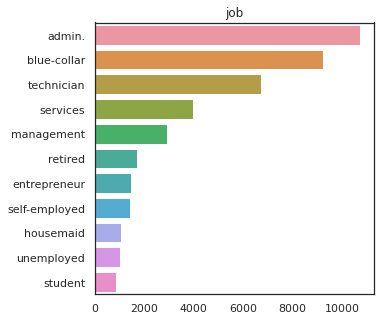

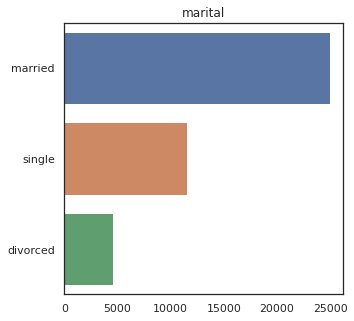

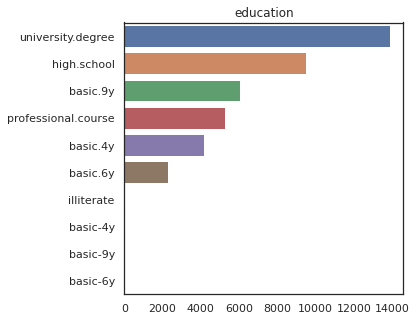

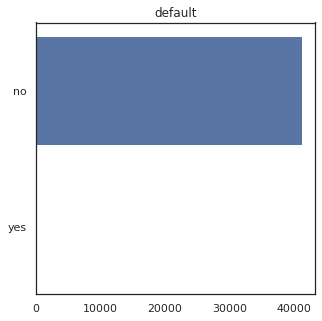

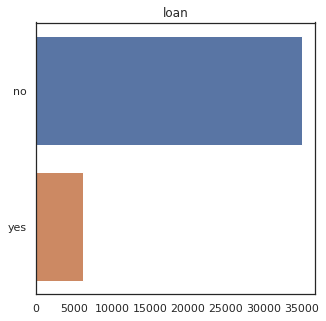

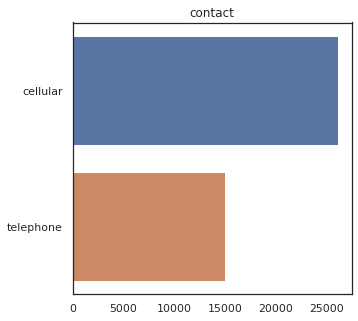

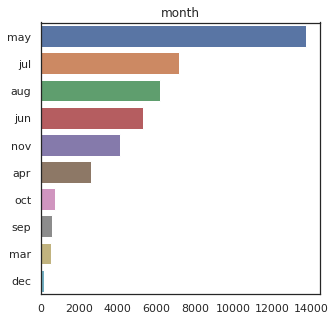

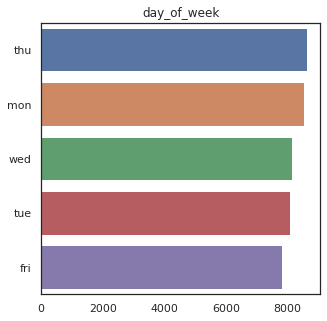

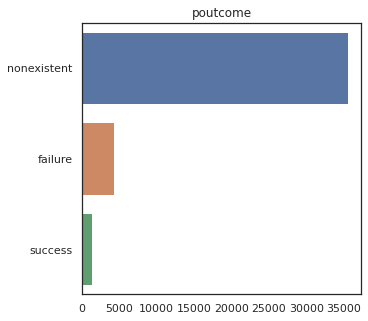

In [42]:
data_b=['job','marital','education','default','loan','contact','month','day_of_week','poutcome']
for col in data_b:
  plt.figure(figsize=(5,5))
  sns.barplot(data[col].value_counts().values,data[col].value_counts().index)
  plt.title(col)
plt.show()

In [43]:
data['age']=data['age'].astype(int)

(array([1.6660e+03, 1.1344e+04, 1.2036e+04, 8.0880e+03, 5.8220e+03,
        1.6130e+03, 3.1800e+02, 2.0200e+02, 8.9000e+01, 1.0000e+01]),
 array([17. , 25.1, 33.2, 41.3, 49.4, 57.5, 65.6, 73.7, 81.8, 89.9, 98. ]),
 <a list of 10 Patch objects>)

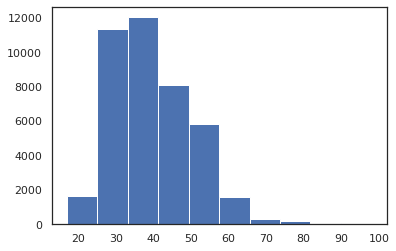

In [44]:
plt.hist(data['age'])

In [54]:
data1=pd.get_dummies(data,columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'])

In [55]:
data1.dtypes

age                       int64
duration                  int64
campaign                  int64
pdays                   float64
previous                  int64
                         ...   
day_of_week_tue           uint8
day_of_week_wed           uint8
poutcome_failure          uint8
poutcome_nonexistent      uint8
poutcome_success          uint8
Length: 61, dtype: object

In [56]:
data1.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic-4y,education_basic-6y,education_basic-9y,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [57]:
# Logistic Regression
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  float64
 4   previous                       41188 non-null  int64  
 5   emp_var_rate                   41188 non-null  float64
 6   cons_price_idx                 41188 non-null  float64
 7   cons_conf_idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr_employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

In [66]:
X=data1.drop(['y'],axis=1)
y=data1['y']

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


In [72]:
from sklearn.metrics import classification_report
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
LR=model.score(X_test,y_test)
print("Accuracy",LR)
print(classification_report(y_test,y_pred))


Accuracy 0.9072590434571498
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10924
           1       0.67      0.40      0.50      1433

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



In [77]:
print('confusion matrix is')
print(confusion_matrix(y_test,y_pred))
print("Accuracy is", LR)

confusion matrix is
[[10634   290]
 [  856   577]]
Accuracy is 0.9072590434571498
